# Lab 3 Report
Submitted By:
Keshav Raj Poudel 

Roll No:
_171346_

_Computer Engineering (Day)_

Task to be performed
1. Perform  DFT of an image and plot magnitude and phase 
2. Perform low pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
3. Perform high pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
4. Compare low and high pass filtering results using 3 types of filter function

**Discrete Fourier Transform (DFT)**

The DFT is the sampled Fourier Transform and therefore does not contain all frequencies forming an image, but only a set of samples which is large enough to fully describe the spatial domain image. The number of frequencies corresponds to the number of pixels in the spatial domain image, i.e. the image in the spatial and Fourier domain are of the same size.

For a square image of size N×N, the two-dimensional DFT is given by:

Eqn: 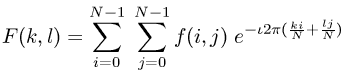

where f(a,b) is the image in the spatial domain and the exponential term is the basis function corresponding to each point F(k,l) in the Fourier space. The equation can be interpreted as: the value of each point F(k,l) is obtained by multiplying the spatial image with the corresponding base function and summing the result.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

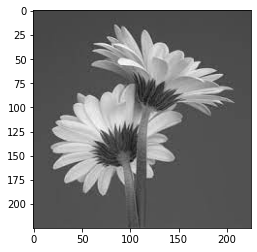

In [30]:
image='/content/drive/MyDrive/Colab Notebooks/kes.jpg'
image = cv2.imread(image)

plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


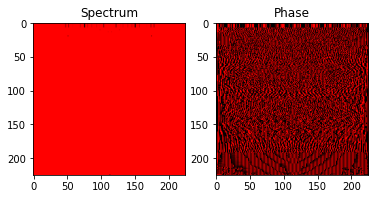

In [31]:
fft_result= np.fft.fft2(image)                        

plt.subplot(1,2,1)
plt.title("Spectrum")
plt.imshow(np.log(1+np.abs(fft_result)), cmap="gray")

plt.subplot(1,2,2)
plt.title("Phase")
plt.imshow(np.angle(fft_result), cmap="gray")

phase= np.angle(fft_result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


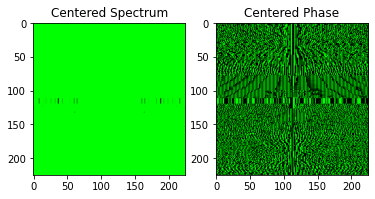

In [32]:
shifted_fourier = np.fft.fftshift(fft_result)

plt.subplot(1,2,1)
plt.title("Centered Spectrum")
plt.imshow(np.log(1+np.abs(shifted_fourier)), cmap="gray")

plt.subplot(1,2,2)
plt.title("Centered Phase")
plt.imshow(np.angle(shifted_fourier), cmap="gray")

phase= np.angle(fft_result)

2. Perform low pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
3. Perform high pass filtering ( you can either use your know function or builtin function for calculating FFT/DFT).
4. Compare low and high pass filtering results using 3 types of filter function

In [23]:
image = cv2.imread("sample-image-1.jpg", 0)

In [22]:
# Function for calculating distance
def distance(point1, point2):
  return np.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

**Gaussian Filter**

A Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image. The filter is implemented as an Odd sized Symmetric Kernel (DIP version of a Matrix) which is passed through each pixel of the Region of Interest to get the desired effect. The kernel is not hard towards drastic color changed (edges) due to it the pixels towards the center of the kernel having more weightage towards the final value then the periphery. A Gaussian Filter could be considered as an approximation of the Gaussian Function (mathematics).

The values inside the kernel are computed by the Gaussian function, which is as follows:

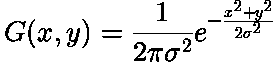

Where,

x → X coordinate value

y → Y coordinate value

π  → Mathematical Constant PI (value = 3.13)

σ → Standard Deviation

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
def gaussianLP(D0, imageShape):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      base[x,y] = np.exp(((-distance((x,y), center)**2)/(2*(D0**2))))
  return base

def gaussianHP(D0, imageShape):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      base[x,y] = 1 - np.exp(((-distance((x,y), center)**2)/(2*(D0**2))))
  return base

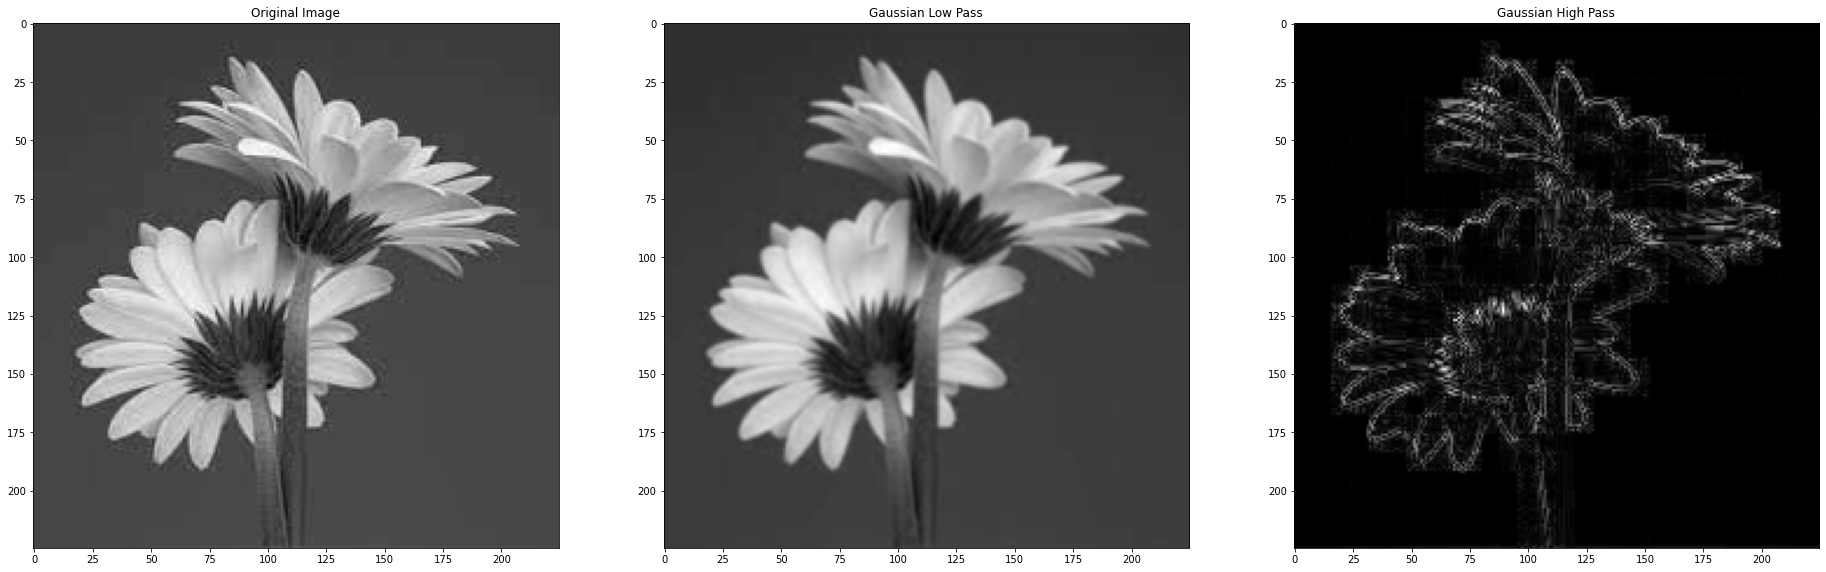

In [35]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/kes.jpg", 0)
original = np.fft.fft2(image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(image, "gray"), plt.title("Original Image")

lowPassCenter = center * gaussianLP(50, image.shape)
lowPass = np.fft.ifftshift(lowPassCenter)
inverse_LowPass = np.fft.ifft2(lowPass)

plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

highPassCenter = center * gaussianHP(50, image.shape)
highPass = np.fft.ifftshift(highPassCenter)
inverse_HighPass = np.fft.ifft2(highPass)

plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

**Ideal Filter**

**Ideal Low Pass Filter**
Simply	 cut	 off	 all	 high	 frequency	 components	 that	 are	 a specified	 distance	 D0 from	 the	
origin	of	the	transform
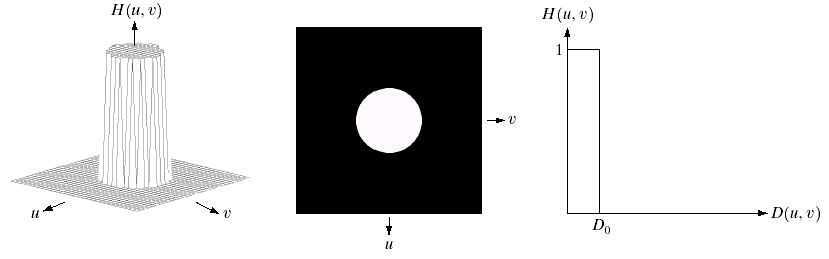

t can be specified by the function-

 $H(u, v)=\left\{\begin{array}{ll}1 & D(u, v) \leq D_{0} \\ 0 & D(u, v)>D_{0}\end{array}\right.$ 
Where,

$D_{0}$ is a positive constant. ILPF passes all the frequencies within a circle of radius $D_{0}$ from the origin without attenuation and cuts off all the frequencies outside the circle.

This $D_{0}$ is the transition point between H(u, v) = 1 and H(u, v) = 0, so this is termed as cutoff frequency.

D(u, v) is the Euclidean Distance from any point (u, v) to the origin of the frequency plane, i.e,
 $D(u, v)=\sqrt{\left(u^{2}+v^{2}\right)}$ 

**Ideal High Pass Filter**

 In the field of Image Processing, Ideal Highpass Filter (IHPF) is used for image sharpening in the frequency domain. Image Sharpening is a technique to enhance the fine details and highlight the edges in a digital image. It removes low-frequency components from an image and preserves high-frequency components.

This ideal highpass filter is the reverse operation of the ideal lowpass filter. It can be determined using the following relation-

  $H_{H P}(u, v)=1-H_{L P}(u, v)$ 

where, $H_{H P}(u, v)$ 
is the transfer function of the highpass filter and $H_{L P}(u, v)$ is the transfer function of the corresponding lowpass filter.

The transfer function of the IHPF can be specified by the function-


 $H(u, v)=\left\{\begin{array}{ll}0 & D(u, v) \leq D_{0} \\ 1 & D(u, v)>D_{0}\end{array}\right.$ 

Where, $D_{0}$ is a positive constant. IHPF passes all the frequencies outside of a circle of radius $D_{0}$ from the origin without attenuation and cuts off all the frequencies within the circle.
This $D_{0}$ is the transition point between H(u, v) = 1 and H(u, v) = 0, so this is termed as cutoff frequency.
D(u, v) is the Euclidean Distance from any point (u, v) to the origin of the frequency plane, i.e, $D(u, v)=\sqrt{\left(u^{2}+v^{2}\right)}$ 


In [36]:
def idealLP(D0, imageShape):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      if distance((x,y), center) <= D0:
        base[x,y] = 1
      else:
        base[x,y] = 0
  return base

def idealHP(D0, imageShape):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      if distance((x,y), center) <= D0:
        base[x,y] = 0
      else:
        base[x,y] = 1
  return base

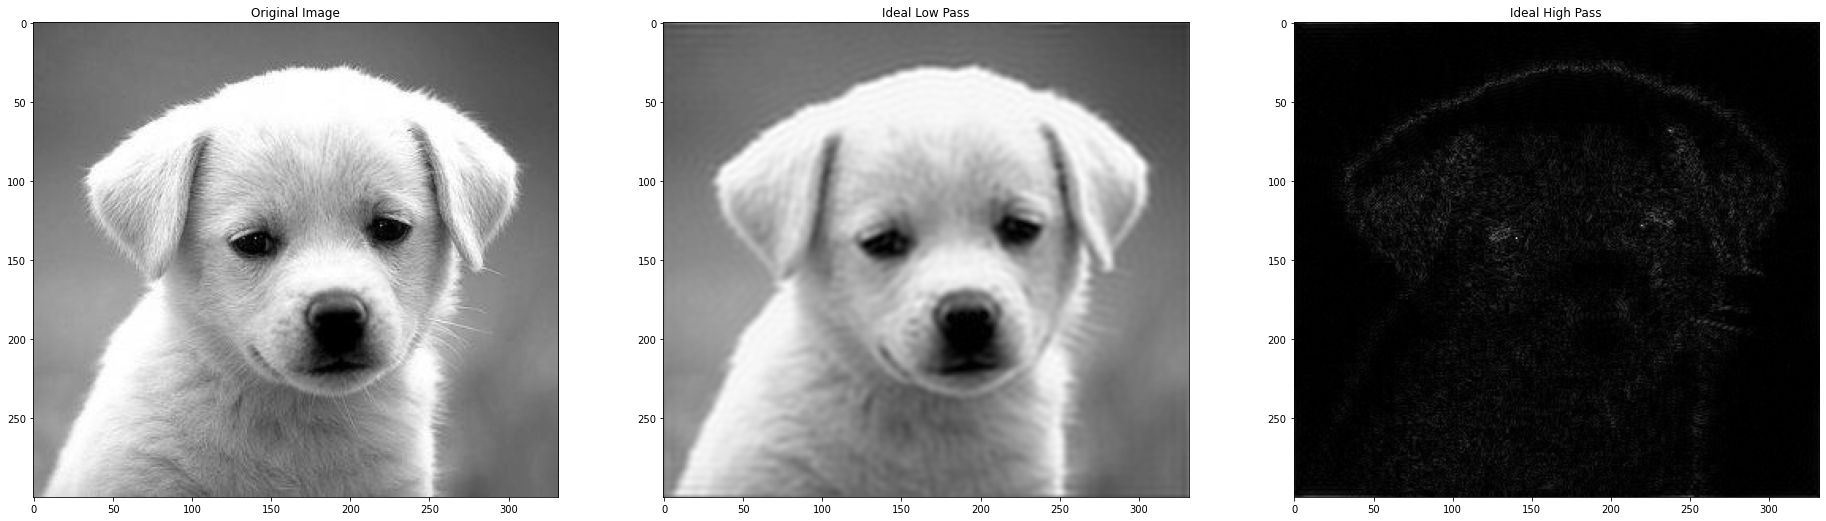

In [37]:
image = image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/pupy.jpeg", 0)
original = np.fft.fft2(image)
center = np.fft.fftshift(original)


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1,3,1), plt.imshow(image, "gray"), plt.title("Original Image")


lowPassCenter = center*idealLP(50, image.shape)
lowPass = np.fft.ifftshift(lowPassCenter)
inverse_LowPass = np.fft.ifft2(lowPass)

plt.subplot(1,3,2)
plt.imshow(np.abs(inverse_LowPass), cmap="gray")
plt.title("Ideal Low Pass")

highPassCenter = center * idealHP(50, image.shape)
highPass = np.fft.ifftshift(highPassCenter)
inverse_HighPass = np.fft.ifft2(highPass)

plt.subplot(1,3,3)
plt.imshow(np.abs(inverse_HighPass), cmap="gray")
plt.title("Ideal High Pass")

plt.show()

**Butterworth Filter**

**Butterworth Low Pass Filter**

The	 transfer	 function	of	a	Butterworth	lowpass	 filter	of	order	n	with	cutoff	 frequency	at	
distance	D0 from	the	origin	is	defined	as:

$H(u, v) = \frac{1}{1+\left[D(u, v) / D_{0}\right]^{2 n}}$

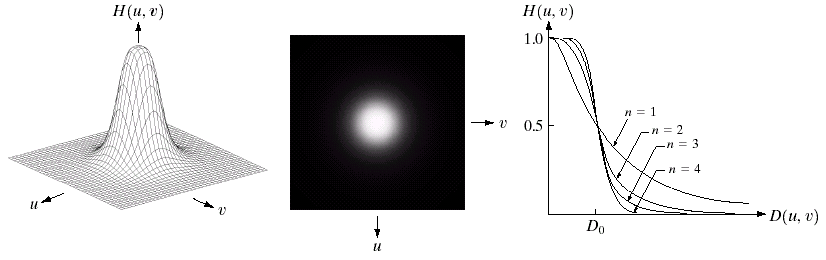

 i.e, $D(u, v)=\sqrt{\left(u^{2}+v^{2}\right)}$ 

**Butterworth High Pass Filter**

In the field of Image Processing, Butterworth Highpass Filter (BHPF) is used for image sharpening in the frequency domain. Image Sharpening is a technique to enhance the fine details and highlight the edges in a digital image. It removes low-frequency components from an image and preserves high-frequency components.
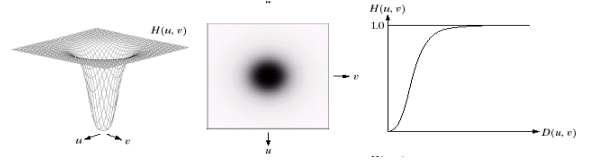

This Butterworth highpass filter is the reverse operation of the Butterworth lowpass filter. It can be determined using the relation-  $H_{H P}(u, v)=1-H_{L P}(u, v)$  where, $H_{H P}(u, v)$ is the transfer function of the highpass filter and $H_{L P}(u, v)$ is the transfer function of the corresponding lowpass filter.

The transfer function of BHPF of order n is defined as-

$H(u, v)= \frac{1}{1+\left[D_{0} / D(u, v)\right]^{2 n}}$

Where,

$D_{0}$ is a positive constant. BHPF passes all the frequencies greater than $D_{0}$ value without attenuation and cuts off all the frequencies less than it.
This $D_{0}$ is the transition point between H(u, v) = 1 and H(u, v) = 0, so this is termed as cutoff frequency. But instead of making a sharp cut-off (like, Ideal Highpass Filter (IHPF)), it introduces a smooth transition from 0 to 1 to reduce ringing artifacts.
D(u, v) is the Euclidean Distance from any point (u, v) to the origin of the frequency plane, i.e, $D(u, v)=\sqrt{\left(u^{2}+v^{2}\right)}$ 


In [38]:
def butterworthLP(D0, imageShape, order):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      base[x,y] = 1/(1+(distance((x,y), center)/D0)**(2*order))
  return base

def butterworthHP(D0, imageShape, order):
  base = np.zeros(imageShape[:2])
  rows, cols = imageShape[:2]
  center = (rows/2, cols/2)
  for x in range(rows):
    for y in range(cols):
      base[x,y] = 1/(1+(D0/distance((x,y),center))**(2*order))
  return base

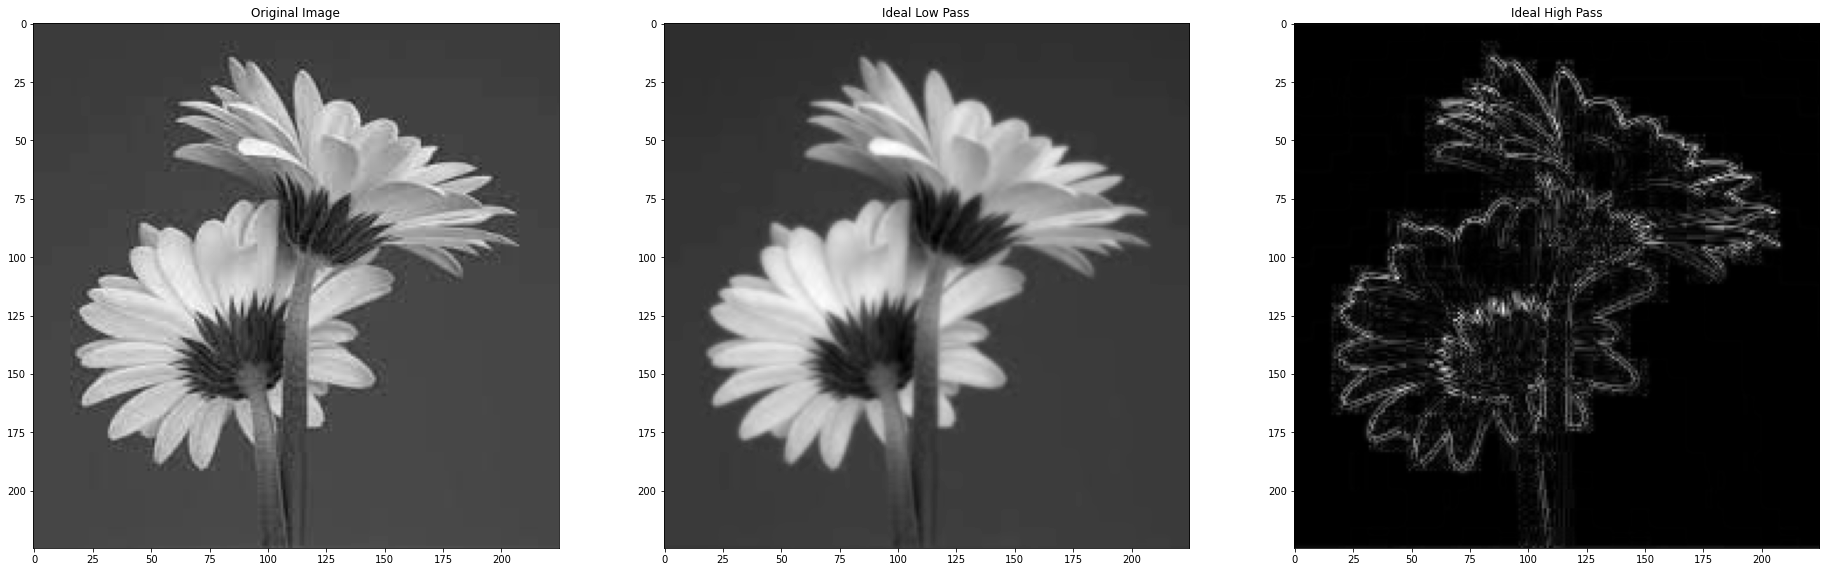

In [39]:
image = image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/kes.jpg", 0)
original = np.fft.fft2(image)
center = np.fft.fftshift(original)


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1,3,1), plt.imshow(image, "gray"), plt.title("Original Image")


lowPassCenter = center * butterworthLP(50, image.shape, 1)
lowPass = np.fft.ifftshift(lowPassCenter)
inverse_LowPass = np.fft.ifft2(lowPass)

plt.subplot(1,3,2)
plt.imshow(np.abs(inverse_LowPass), cmap="gray")
plt.title("Ideal Low Pass")

highPassCenter = center * butterworthHP(50, image.shape, 1)
highPass = np.fft.ifftshift(highPassCenter)
inverse_HighPass = np.fft.ifft2(highPass)

plt.subplot(1,3,3)
plt.imshow(np.abs(inverse_HighPass), cmap="gray")
plt.title("Ideal High Pass")

plt.show()

conclusion:- 

In this way, we perform the following operation
